# Normality Testing

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns # for nice looking plots
# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [47]:
n=50
def random_distributions(n=50):
  mu, sigma, p = 5, 2*np.sqrt(2), 0.3# mean, standard deviation, probabilty of success
  shape, scale = 2.5, 2. # mean=5, std=2*sqrt(2)
  normal_dist = np.random.normal(mu, sigma, n)
  lognormal_dist = np.random.lognormal(mu, sigma, n)
  lognormal_dist = np.random.lognormal(np.log2(mu), np.log2(sigma), n) 
  pareto_dist = np.random.pareto(mu, n)
  uniform_dist= np.random.uniform(np.amin(normal_dist),np.amax(normal_dist),n)
  binomial_dist= np.random.binomial(n, p,n)
  gamma_dist= np.random.gamma(shape, scale, n) 
  poisson_dist= np.random.poisson((n*0.05), n)  
  df = pd.DataFrame({'Normal' : normal_dist, 'Lognormal' : lognormal_dist, 'Pareto' : pareto_dist,'Gamma' : gamma_dist, 'Poisson' : poisson_dist, 'Binomial' : binomial_dist, 'Uniform' : uniform_dist})
  return df

In [48]:
df=random_distributions(n=50)
df.head()

,Binomial,Gamma,Lognormal,Normal,Pareto,Poisson,Uniform
0,23,2.138120,75.533807,1.889466,0.549475,5,5.942965
1,11,2.491311,9.084415,5.451245,0.002251,5,3.343928
2,17,4.269309,38.189137,7.442324,0.689812,7,3.243689
3,19,2.338584,31.970425,4.973306,0.126659,1,6.403353
4,13,3.494885,2.856957,8.509515,0.002299,5,6.585476


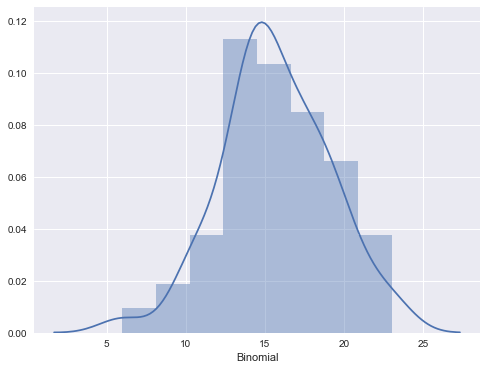

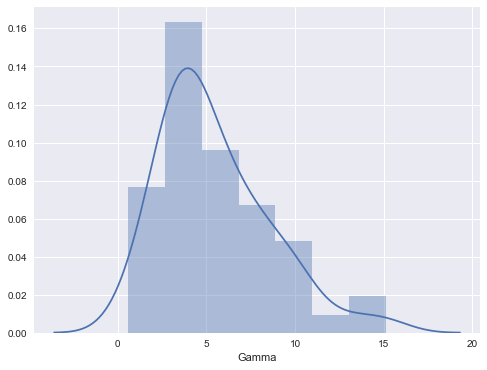

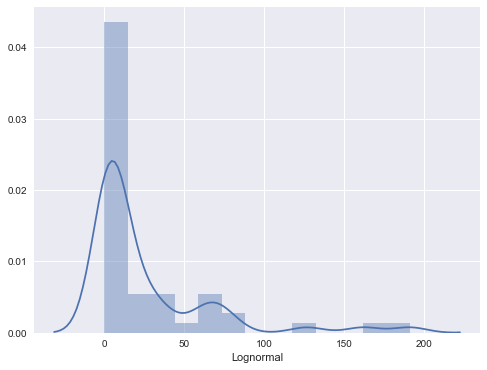

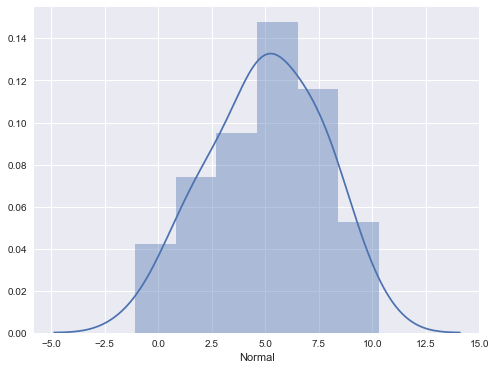

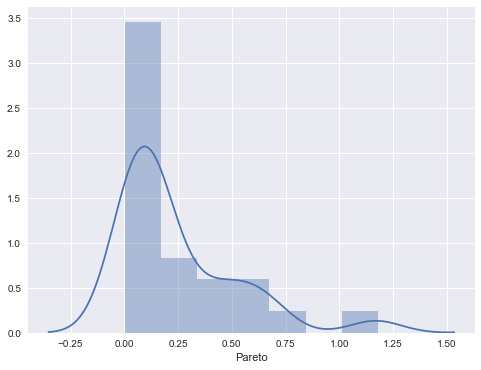

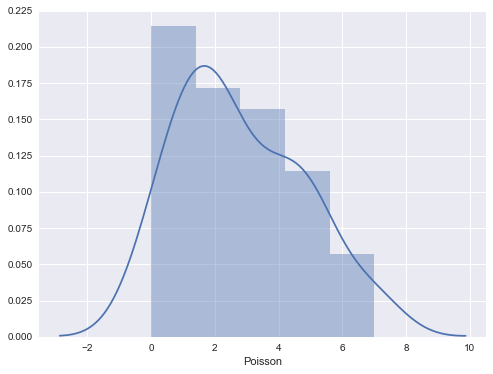

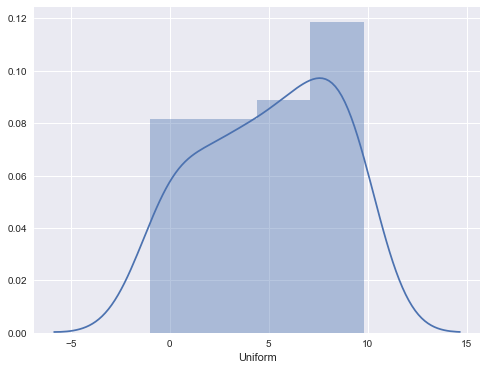

In [49]:
def show_distributions(df):
    for col in list(df.columns.values):    
      sns.distplot(df[col])
      sns.plt.show()
show_distributions(df)    
    

In [50]:
def qqplot_stats(obs, c):
    z = (obs-np.mean(obs))/np.std(obs)
    stats.probplot(z, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot for " + c)
    plt.show()
        

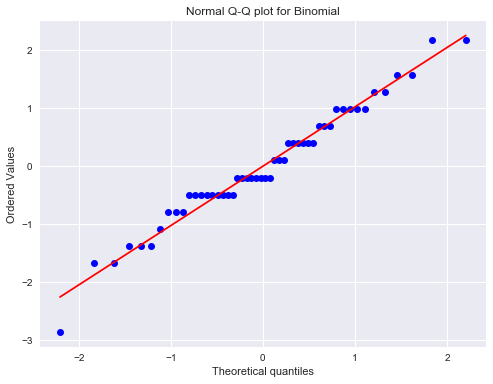

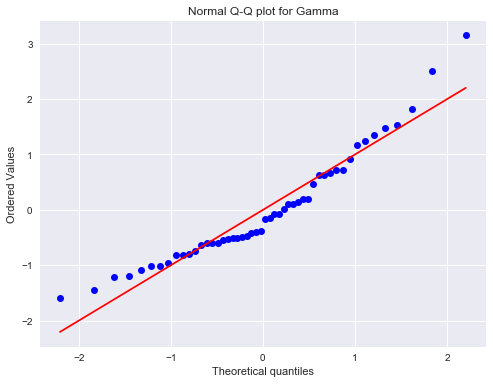

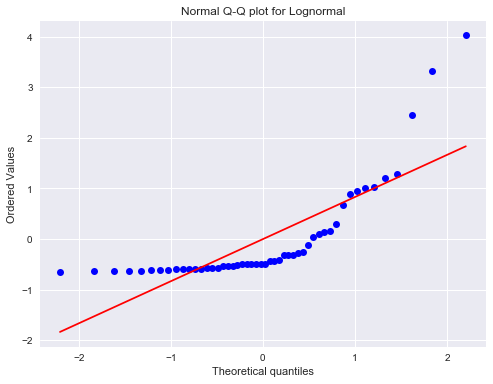

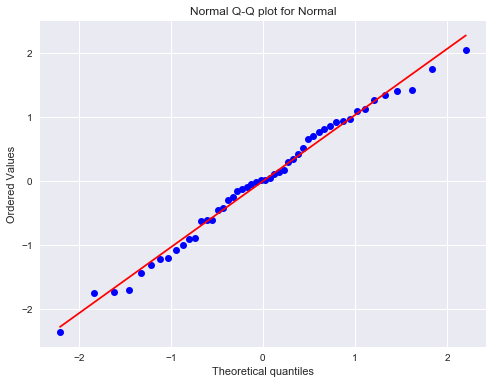

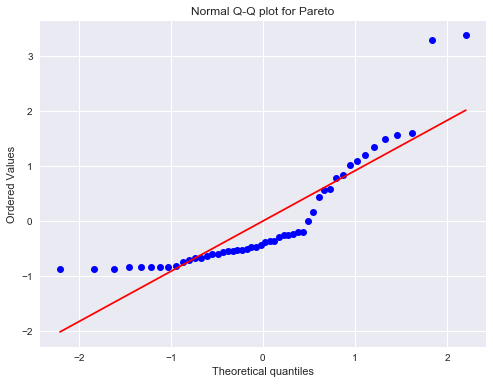

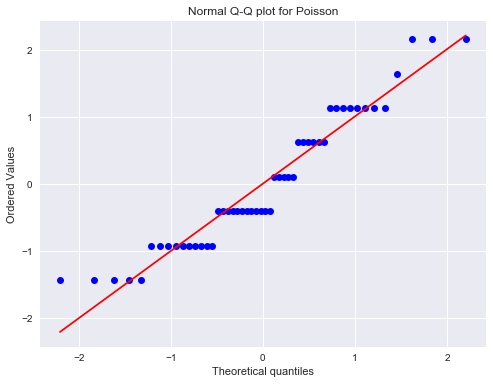

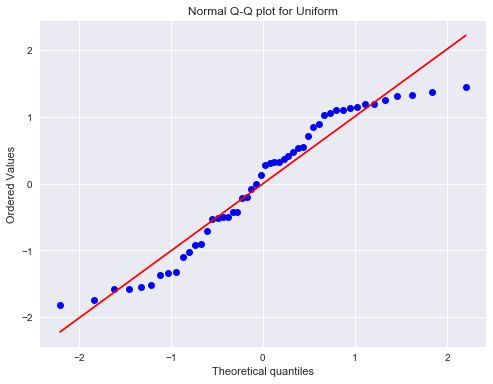

In [51]:
def qqplot_df(df):
    for col in list(df.columns.values):
      qqplot_stats(df[col], col)
qqplot_df(df) 

### Statistical tests for normality (e.g. Shapiro-Wilk test,  Anderson-Darling test, scipy.stats.normaltest, etc.)

In [52]:
def normality_stats(df):
    s={}
    for col in list(df.columns.values):
      s[col]={}
    for col in list(df.columns.values):
      s[col].update({'shapiro':stats.shapiro(df[col])})
      s[col].update({'anderson':stats.anderson(df[col], dist='norm')})
      s[col].update({'normaltest':stats.normaltest(df[col])})      
    return s


### Shapiro-Wilk test
scipy.stats.shapiro [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

scipy.stats.shapiro
scipy.stats.shapiro(x, a=None, reta=False)[source]
Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

Parameters:	
x : array_like
Array of sample data.
a : array_like, optional
Array of internal parameters used in the calculation. If these are not given, they will be computed internally. If x has length n, then a must have length n/2.
reta : bool, optional
Whether or not to return the internally computed a values. The default is False.
Returns:	
W : float
The test statistic.
p-value : float
The p-value for the hypothesis test.
a : array_like, optional
If reta is True, then these are the internally computed “a” values that may be passed into this function on future calls.

### Anderson-Darling test

scipy.stats.anderson [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

scipy.stats.anderson(x, dist='norm')
Anderson-Darling test for data coming from a particular distribution

The Anderson-Darling test is a modification of the Kolmogorov- Smirnov test kstest for the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

Parameters:	
x : array_like
array of sample data
dist : {‘norm’,’expon’,’logistic’,’gumbel’,’gumbel_l’, gumbel_r’,
‘extreme1’}, optional the type of distribution to test against. The default is ‘norm’ and ‘extreme1’, ‘gumbel_l’ and ‘gumbel’ are synonyms.
Returns:	
statistic : float
The Anderson-Darling test statistic
critical_values : list
The critical values for this distribution
significance_level : list
The significance levels for the corresponding critical values in percents. The function returns critical values for a differing set of significance levels depending on the distribution that is being tested against.

Note: The critical values are for a given significance level. When we want a smaller significance level, then we have to increase the critical values, assuming we are in the right, upper tail of the distribution.
 
### scipy.stats.normaltest

scipy.stats.normaltest [https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html)
scipy.stats.normaltest(a, axis=0)
Tests whether a sample differs from a normal distribution.

This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [R251], [R252] test that combines skew and kurtosis to produce an omnibus test of normality.

Parameters:	
a : array_like
The array containing the data to be tested.
axis : int or None
If None, the array is treated as a single data set, regardless of its shape. Otherwise, each 1-d array along axis axis is tested.
Returns:	
k2 : float or array
s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.
p-value : float or array
A 2-sided chi squared probability for the hypothesis test.

In [53]:
norm_stats=normality_stats(df)
print norm_stats

{'Lognormal': {'shapiro': (0.6518936157226562, 1.247178249563774e-09), 'anderson': AndersonResult(statistic=6.1794855908741226, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=41.010291263910851, pvalue=1.2437365619761186e-09)}, 'Normal': {'shapiro': (0.9865315556526184, 0.8349295258522034), 'anderson': AndersonResult(statistic=0.21605685062957747, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=1.0771543178578229, pvalue=0.58357800068157384)}, 'Uniform': {'shapiro': (0.9308675527572632, 0.005960707552731037), 'anderson': AndersonResult(statistic=0.98269881136928916, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=13.552628238

In [54]:
df=random_distributions(n=500)
df.head()

,Binomial,Gamma,Lognormal,Normal,Pareto,Poisson,Uniform
0,170,2.667804,8.112948,-1.532238,0.036731,31,9.475047
1,154,4.887884,1.216734,7.118652,0.967965,16,-1.525676
2,149,3.719089,39.891215,3.436231,0.086043,29,4.969079
3,159,9.936651,54.539597,6.187175,0.067760,24,9.960512
4,150,3.174396,14.542416,2.408586,0.186702,23,5.028367


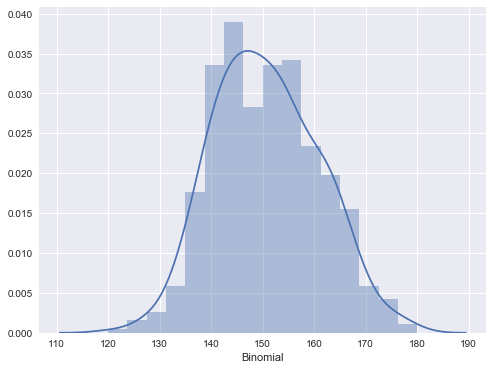

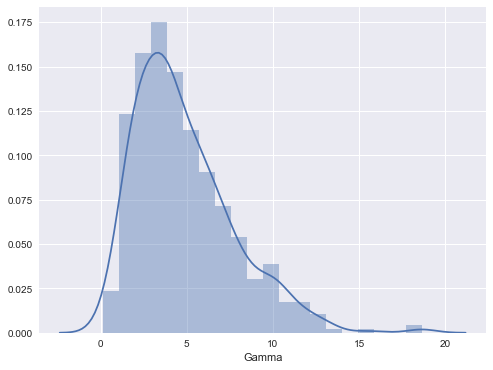

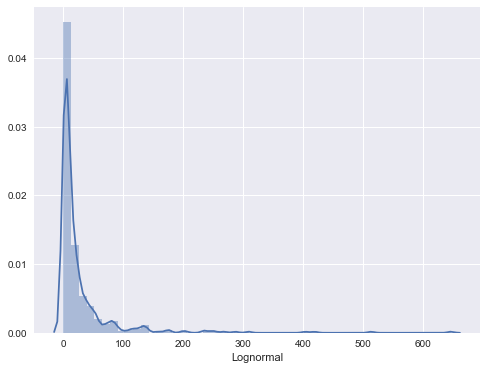

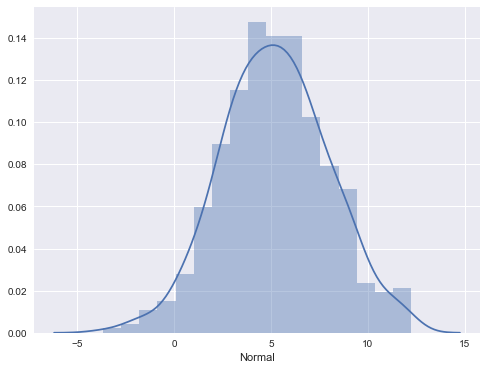

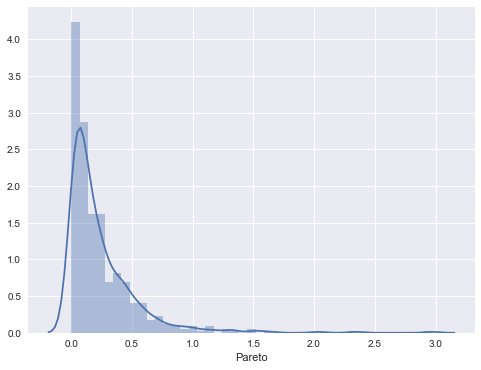

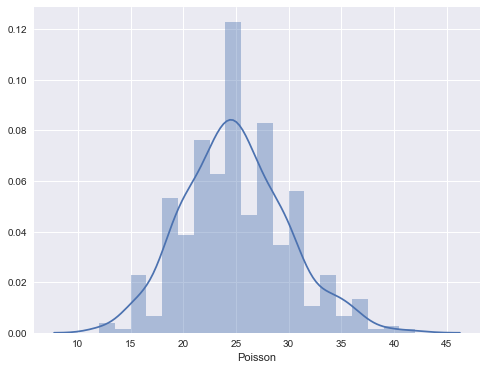

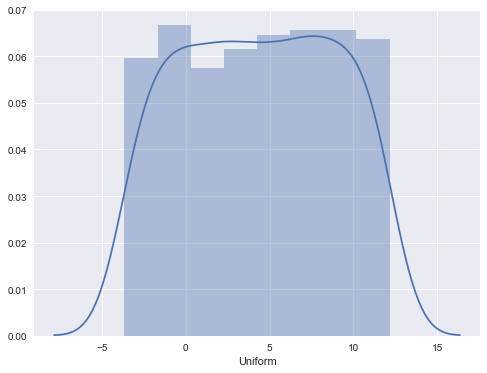

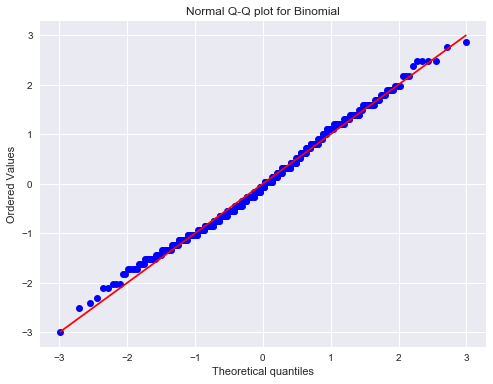

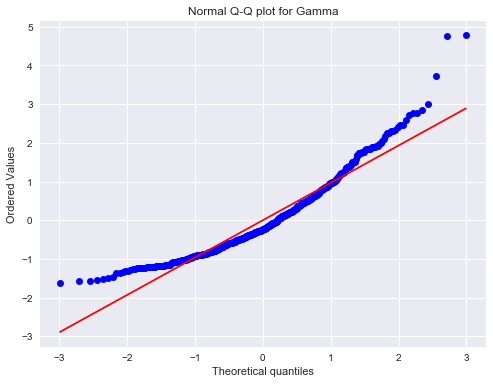

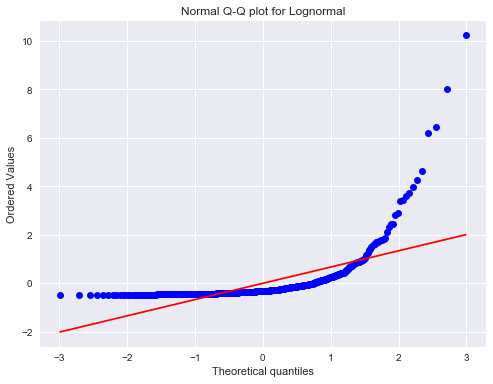

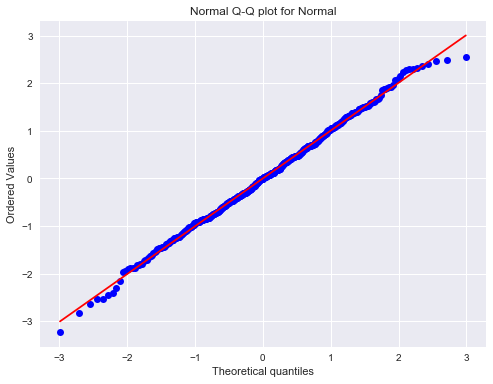

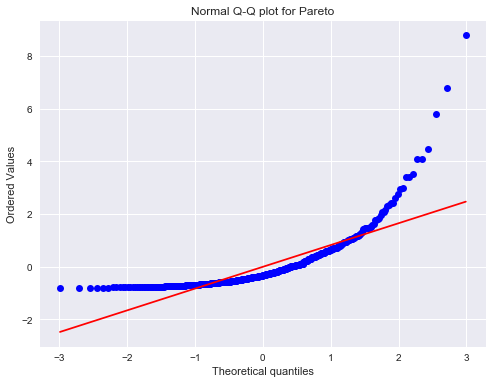

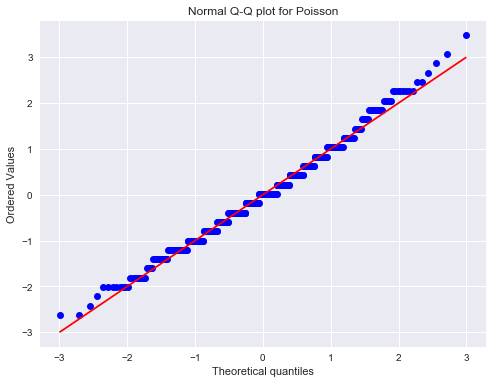

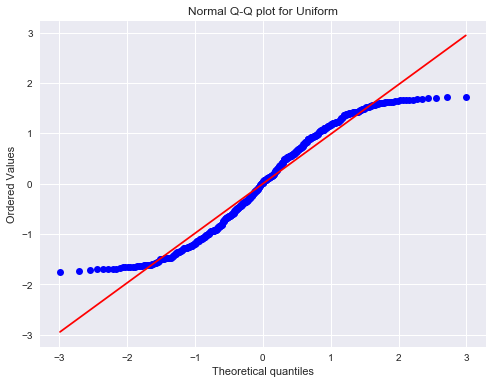

In [55]:
show_distributions(df)
qqplot_df(df)

In [56]:
norm_stats=normality_stats(df)
print norm_stats

{'Lognormal': {'shapiro': (0.4502159357070923, 2.0339636005970177e-36), 'anderson': AndersonResult(statistic=inf, critical_values=array([ 0.571,  0.651,  0.781,  0.911,  1.083]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=565.96748823210714, pvalue=1.2639254596805757e-123)}, 'Normal': {'shapiro': (0.9974722862243652, 0.6516730189323425), 'anderson': AndersonResult(statistic=0.21242992155254115, critical_values=array([ 0.571,  0.651,  0.781,  0.911,  1.083]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=0.0055807143091066739, pvalue=0.99721353227349951)}, 'Uniform': {'shapiro': (0.9550996422767639, 3.369457837743006e-11), 'anderson': AndersonResult(statistic=5.4325826912816524, critical_values=array([ 0.571,  0.651,  0.781,  0.911,  1.083]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=295.88012129392291, pv

In [57]:
df=random_distributions(n=5000)
df.head()

,Binomial,Gamma,Lognormal,Normal,Pareto,Poisson,Uniform
0,1512,2.635149,3.198509,9.554596,0.200702,244,13.864836
1,1530,7.200271,10.173678,4.968055,0.257876,266,1.118668
2,1513,0.579984,12.102898,9.126410,0.121064,246,-2.015083
3,1543,1.432716,5.279594,-0.650352,0.025298,221,-4.045599
4,1522,2.039510,13.955446,3.053236,0.000490,227,12.117491


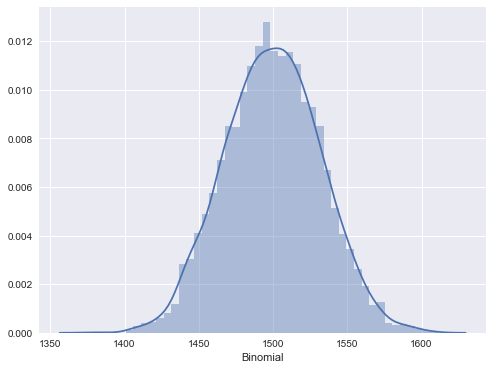

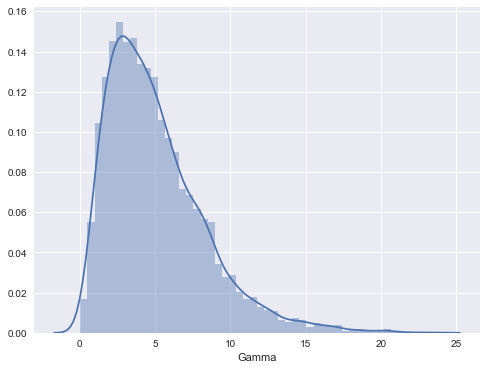

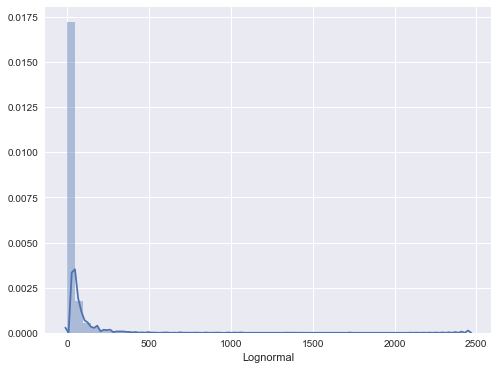

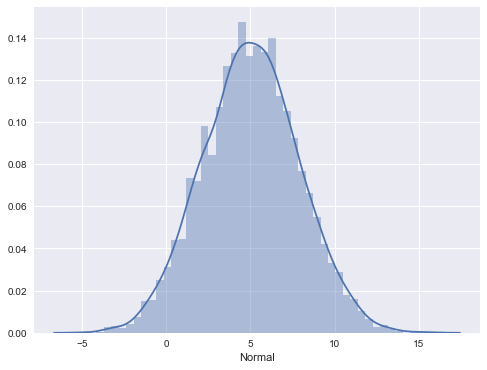

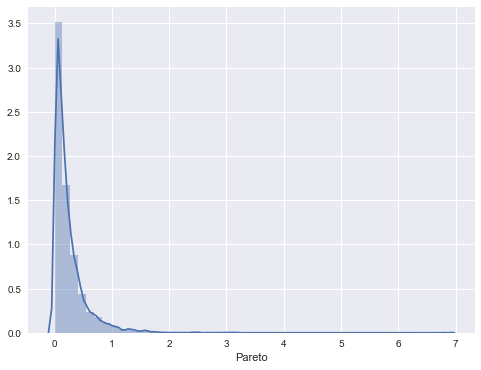

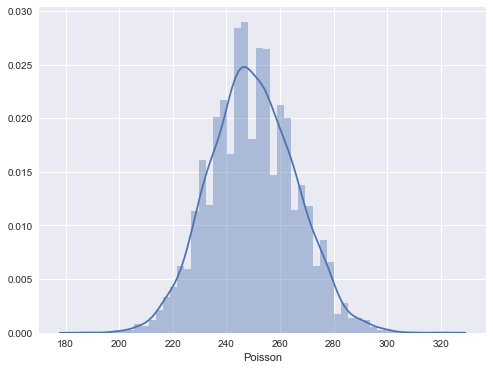

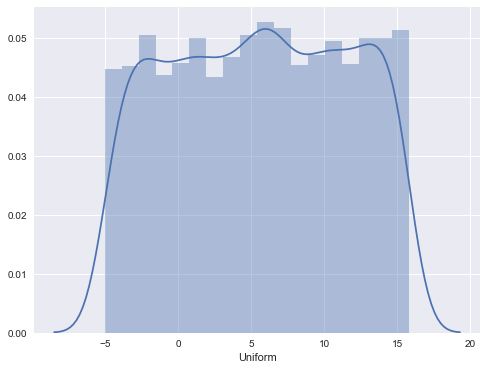

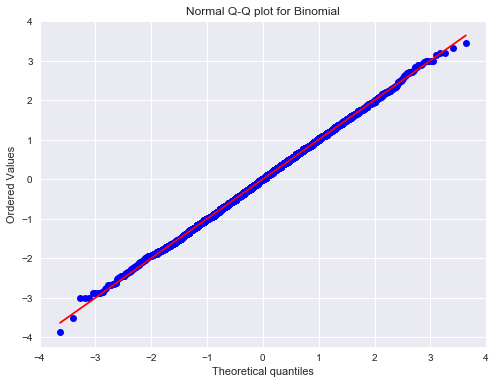

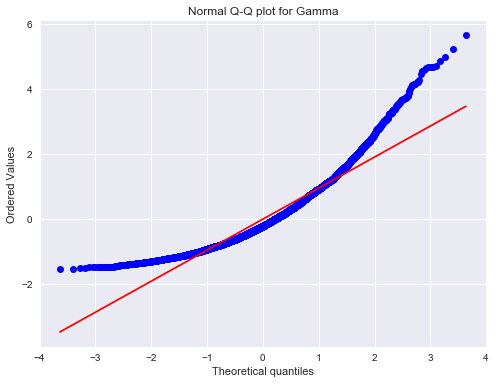

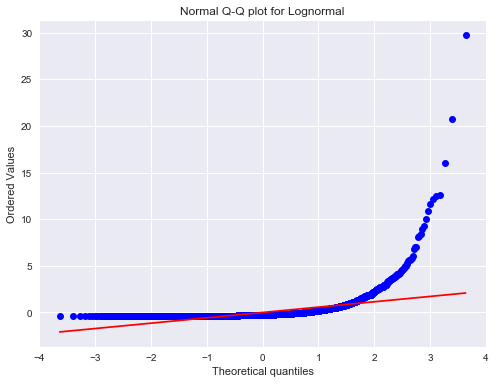

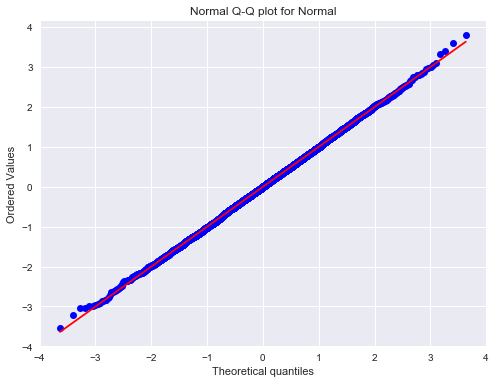

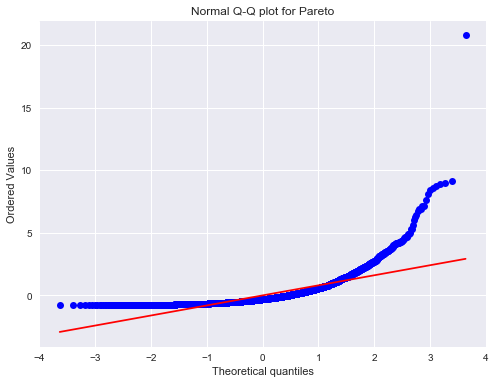

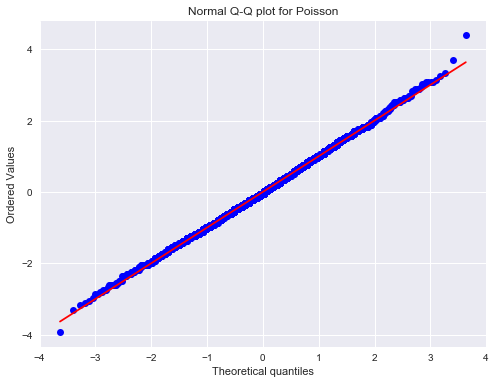

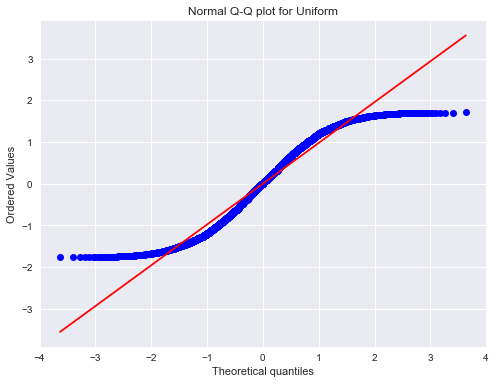

In [58]:
show_distributions(df)
qqplot_df(df)

In [59]:
norm_stats=normality_stats(df)
print norm_stats

{'Lognormal': {'shapiro': (0.33013206720352173, 0.0), 'anderson': AndersonResult(statistic=inf, critical_values=array([ 0.576,  0.655,  0.786,  0.917,  1.091]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=8592.8076994894564, pvalue=0.0)}, 'Normal': {'shapiro': (0.99977707862854, 0.907048761844635), 'anderson': AndersonResult(statistic=0.21087869964503625, critical_values=array([ 0.576,  0.655,  0.786,  0.917,  1.091]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=1.0184487008087841, pvalue=0.60096153365061578)}, 'Uniform': {'shapiro': (0.9557133913040161, 1.7156084991510004e-36), 'anderson': AndersonResult(statistic=53.397768757083213, critical_values=array([ 0.576,  0.655,  0.786,  0.917,  1.091]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=3771.3482404044207, pvalue=0.0)}, 'Binomial': {'shapiro': (0.9995

In [60]:
#Read in data from source 
df = pd.read_csv("../data/admissions.csv")
df = df.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


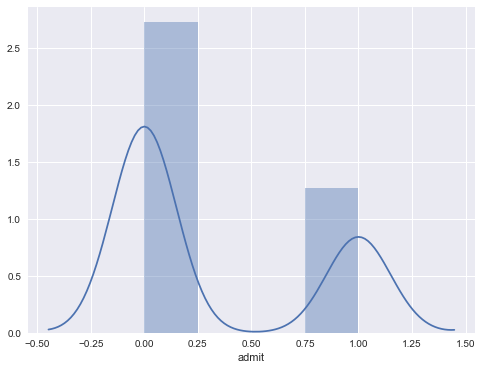

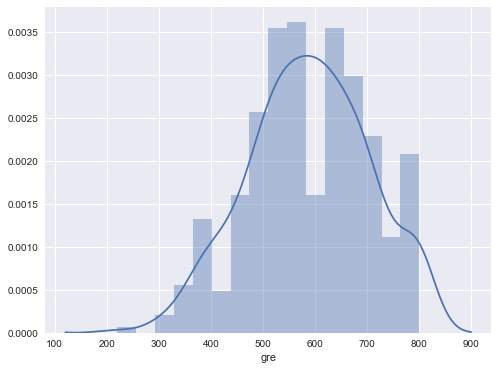

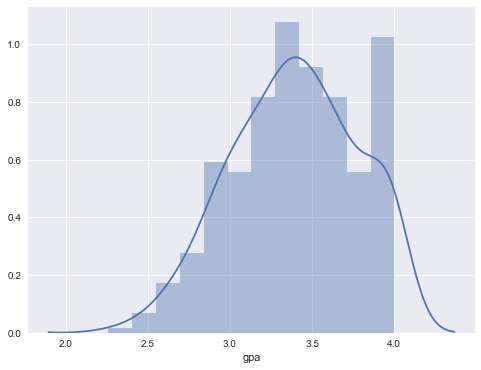

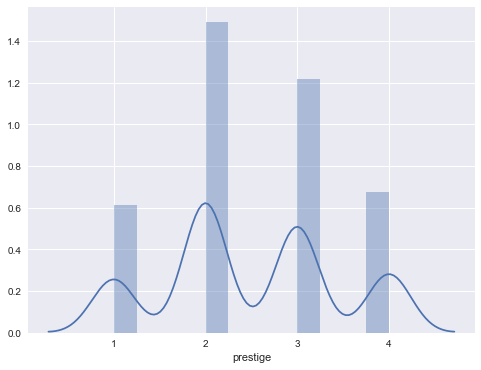

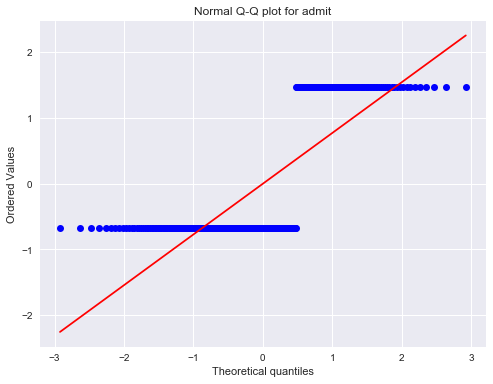

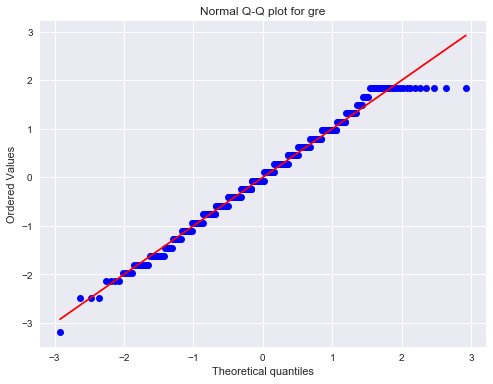

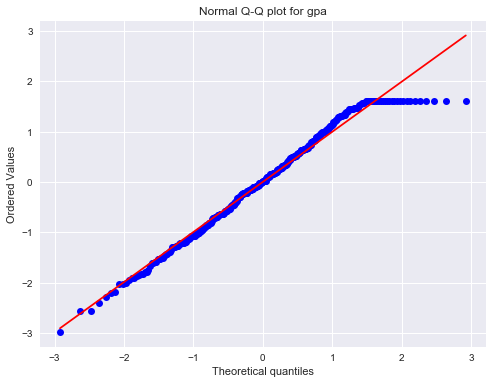

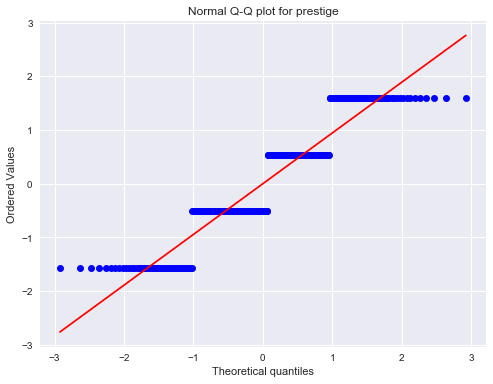

In [61]:
show_distributions(df)
qqplot_df(df)

In [62]:
norm_stats=normality_stats(df)
print norm_stats

{'admit': {'shapiro': (0.5860795974731445, 1.1764600993651039e-29), 'anderson': AndersonResult(statistic=83.932899039296672, critical_values=array([ 0.57 ,  0.65 ,  0.779,  0.909,  1.081]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=2203.8207987184628, pvalue=0.0)}, 'gre': {'shapiro': (0.9857397079467773, 0.0006041502929292619), 'anderson': AndersonResult(statistic=0.9583351930669437, critical_values=array([ 0.57 ,  0.65 ,  0.779,  0.909,  1.081]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)}, 'gpa': {'shapiro': (0.9772263765335083, 6.794117325625848e-06), 'anderson': AndersonResult(statistic=1.4410937098707564, critical_values=array([ 0.57 ,  0.65 ,  0.779,  0.909,  1.081]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=13.079875560916445, pvalue=0.0014445783